In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torchvision.transforms as transforms

In [0]:
train_data = torchvision.datasets.FashionMNIST(root = "./data", 
                                               train = True, download = True, 
                                               transform = transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(train_data, batch_size=4, shuffle = True)
data_iterator = iter(train_loader)
images, labels = data_iterator.next()

**Visualizing the data.**

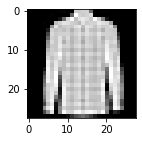

In [7]:
im = images[1]
np_im = im.numpy()
np.squeeze(np_im).shape
plt.figure(figsize = (2,2))
plt.imshow(np.squeeze(np_im), cmap = 'gray')
plt.show()

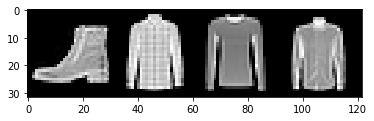

Ankle Boot Shirt Pullover Shirt


In [8]:
classes = ('T-Shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot')

def imshow(img):
    npimg = img.numpy() #convert the tensor to numpy for displaying the image
    plt.imshow(np.transpose(npimg, (1, 2, 0))) #for displaying the image, shape of the image should be height * width * channels
    plt.show()

imshow(torchvision.utils.make_grid(images))
print(' '.join(classes[labels[j]] for j in range(4)))

**Deep CNN**

In [0]:
class DeepCNN(nn.Module):
  def __init__(self):
    super(DeepCNN, self).__init__()
    self.model = nn.Sequential(
        nn.Conv2d(1, 8, 3),
        nn.Conv2d(8, 16, 3)
    )
  def forward(self, t):
    t = self.model(t)
    return t

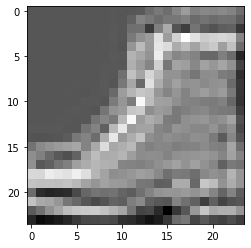

In [17]:
net = DeepCNN()
output = net(images)
plt.imshow(output[0, 0, :, :].detach().numpy(), cmap = 'gray')

**Deep CNN with MaxPool and Tanh activation.**

In [0]:
class DeepCNN_tanh(nn.Module):
  def __init__(self):
    super(DeepCNN_tanh, self).__init__()
    self.model = nn.Sequential(
        nn.Conv2d(1, 8, 3),
        nn.MaxPool2d(2, stride=2),
        nn.Conv2d(8, 16, 3),
        nn.MaxPool2d(2, stride=2)
    )
  def forward(self, t):
    t = self.model(t)
    return t

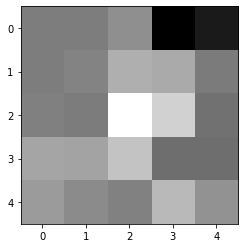

In [19]:
net = DeepCNN_tanh()
output = net(images)
plt.imshow(output[0, 0, :, :].detach().numpy(), cmap = 'gray')

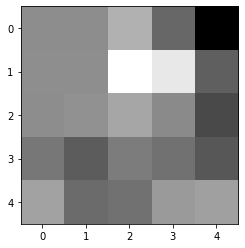

In [21]:
net = DeepCNN_tanh()
output = net(images)
plt.imshow(output[0, 1, :, :].detach().numpy(), cmap = 'gray')

**DeepCNN with 5 kernels, tanh, and maxpooling**

In [0]:
class DeepCNN_5k(nn.Module):
  def __init__(self):
    super(DeepCNN_5k, self).__init__()
    self.model_cnn = nn.Sequential(
        nn.Conv2d(1, 6, 5),
        nn.Tanh(),
        nn.MaxPool2d(2, stride=2),

        nn.Conv2d(6, 16, 5),
        nn.Tanh(),
        nn.MaxPool2d(2, stride=2)
    )
    self.model = nn.Sequential(
        nn.Linear(256, 120),
        nn.Tanh(),
        nn.Linear(120, 84),
        nn.Tanh(),
        nn.Linear(84, 10)
    )

  def forward(self, t):
    t = self.model_cnn(t)
    t = t.view(t.size(0), -1)
    t = self.model(t)
    return t

In [0]:
net = DeepCNN_5k()
output = net(images)

In [0]:
batch_size = 128

train_data = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_data = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)

In [0]:
def accuracy_evaluation(data_loader):
    total, correct = 0, 0
    for data in data_loader:
        inputs, labels = data
        outputs = net(inputs)
        _, predictions = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predictions == labels).sum().item()
        
    return(100 * correct/total)

In [0]:
net = DeepCNN_5k()
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())

Epoch: 0/10, Test acc: 89.92, Train acc: 92.05
Epoch: 1/10, Test acc: 89.72, Train acc: 92.31
Epoch: 2/10, Test acc: 90.07, Train acc: 92.42
Epoch: 3/10, Test acc: 89.61, Train acc: 92.50
Epoch: 4/10, Test acc: 90.05, Train acc: 93.13
Epoch: 5/10, Test acc: 89.63, Train acc: 92.78
Epoch: 6/10, Test acc: 90.54, Train acc: 93.75
Epoch: 7/10, Test acc: 90.35, Train acc: 93.73
Epoch: 8/10, Test acc: 90.29, Train acc: 93.85
Epoch: 9/10, Test acc: 90.26, Train acc: 94.20


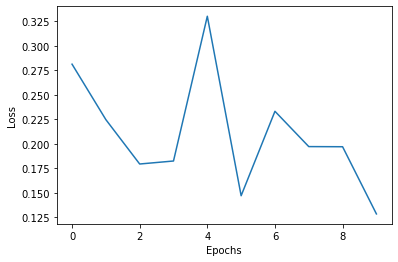

In [49]:
loss_array = []
loss_epoch_array = []
max_epochs = 10

for epoch in range(max_epochs):

    for i, data in enumerate(train_loader, 0):

        inputs, labels = data
        
        #forward pass
        outputs = net(inputs)
        loss = loss_function(outputs, labels)
        
        #backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        loss_array.append(loss.item())
        
    loss_epoch_array.append(loss.item())
        
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, accuracy_evaluation(test_loader), accuracy_evaluation(train_loader)))
    
    
plt.plot(loss_epoch_array)
plt.xlabel("Epochs"), plt.ylabel("Loss")
plt.show()

**DeepCNN with 5 kernels and ReLU**

In [0]:
class DeepCNN_5k_ReLU(nn.Module):
  def __init__(self):
    super(DeepCNN_5k_ReLU, self).__init__()
    self.model_cnn = nn.Sequential(
        nn.Conv2d(1, 6, 5),
        nn.ReLU(),
        nn.AvgPool2d(2, stride=2),

        nn.Conv2d(6, 16, 5),
        nn.ReLU(),
        nn.AvgPool2d(2, stride=2)
    )
    self.model = nn.Sequential(
        nn.Linear(256, 120),
        nn.ReLU(),
        nn.Linear(120, 84),
        nn.ReLU(),
        nn.Linear(84, 10)
    )

  def forward(self, t):
    t = self.model_cnn(t)
    t = t.view(t.size(0), -1)
    t = self.model(t)
    return t

In [0]:
net = DeepCNN_5k_ReLU()
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())

Epoch: 0/10, Test acc: 79.22, Train acc: 79.86
Epoch: 1/10, Test acc: 82.82, Train acc: 83.89
Epoch: 2/10, Test acc: 84.85, Train acc: 86.21
Epoch: 3/10, Test acc: 84.75, Train acc: 85.95
Epoch: 4/10, Test acc: 86.51, Train acc: 87.57
Epoch: 5/10, Test acc: 85.76, Train acc: 86.88
Epoch: 6/10, Test acc: 87.65, Train acc: 88.83
Epoch: 7/10, Test acc: 87.93, Train acc: 88.55
Epoch: 8/10, Test acc: 87.88, Train acc: 88.64
Epoch: 9/10, Test acc: 88.25, Train acc: 89.34


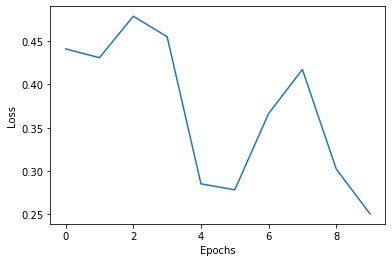

In [58]:
loss_array = []
loss_epoch_array = []
max_epochs = 10

for epoch in range(max_epochs):

    for i, data in enumerate(train_loader, 0):

        inputs, labels = data
        
        #forward pass
        outputs = net(inputs)
        loss = loss_function(outputs, labels)
        
        #backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        loss_array.append(loss.item())
        
    loss_epoch_array.append(loss.item())
        
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, accuracy_evaluation(test_loader), accuracy_evaluation(train_loader)))
    
    
plt.plot(loss_epoch_array)
plt.xlabel("Epochs"), plt.ylabel("Loss")
plt.show()